
# Práctica 2: Metaheurísticas basadas en trayectorias: Tabu Search

<center><h3>
    David Pacios Vazquez
</h3></center>


# Instrucciones

Igual que en la Práctica 1, utilizaremos un **Jupyter Notebook** para la resolución de esta práctica.

Como ya sabéis, nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica. Aun así, a continuación tenéis unas breves instrucciones sobre como funciona:

* Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**
* Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
* Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Se te pedirán dos implementaciones del algoritmo de Búsqueda Tabú, una primera implementación obligatoria y una implementación mejorada optativa. Escribe el código de tu o tus soluciones en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_BusquedaTabu.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_BusquedaTabu.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_BusquedaTabu.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.
 
 ---


# Preliminares adicionales sobre Python

Además de lo visto en las prácticas anteriores, conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte útiles más adelante en la realización de esta práctica y en el uso del lenguaje en general.


Por ejemplo, cuando necesitas consultar documentación sobre paquetes Python, conviene que conozcas la versión que estás utilizando en tu entorno para poder encontrar las especificidades de cada *release*. Fíjate que en la sección *Docs by version* de la web https://docs.python.org/3/ puedes seleccionar los documentos de referencia de la versión.

Para averiguar la versión que está ejecutando este Jupyter Noteboook puedes emplear las siguientes líneas.

In [1]:
from platform import python_version

print(python_version())


3.11.5


Un paquete interesante puede ser statistics. Conociendo la versión, puedes puedes consultar la documentación y la lista completa de funciones disponibles: https://docs.python.org/3/library/statistics.html

A modo ilustrativo, puedes obtener estadísticos sobre series de datos de la siguiente forma.


In [2]:
import statistics

# ejemplo de obtención de medias y desviaciones típicas
listav = [1, 2, 3, 4, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)

listav = [1.0, 2.5, 3.75, 4.25, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)


3 1.5811388300841898
3.3 1.5751984002023365


Otro paquete que puede resultarte útil a la hora de crear un informe o documentar tu práctica puede ser `matplotlib.pyplot`, que permite hacer gráficas de manera integrada en el propio Notebook. Puedes consultar sus capacidades en https://matplotlib.org/stable/gallery/index.html

Veámos un ejemplo ilustrativo.

In [3]:
def is_running_in_ipython():
    try:
        __IPYTHON__
        return True
    except NameError:
        return False

In [4]:
is_running_in_ipython()

True

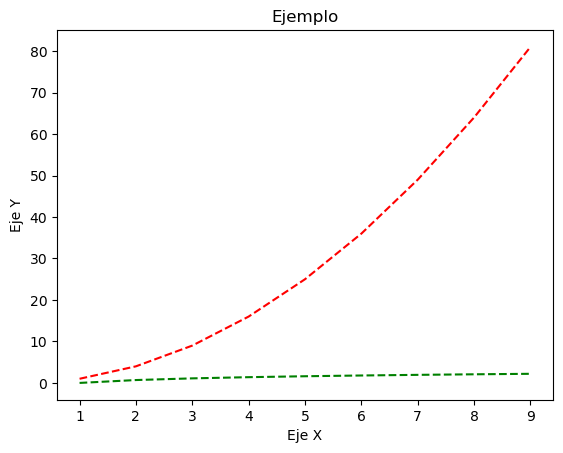

In [5]:
# Indicamos al Notebook que queremos figuras interactivas (esto sólo es necesario hacerlo una vez)
%matplotlib inline

import matplotlib.pyplot as plt  # Importamos la librería (esto sólo es necesario hacerlo una vez)
import math

# definimos algunas líneas de tendencia arbitrarias
vectorx = [x for x in range (1,10)]
vectorlogy = [ math.log(i) for i in vectorx ]
vectorpowy = [ math.pow(i, 2) for i in vectorx ]

fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.plot(vectorx, vectorlogy, '--', color="green")
ax.plot(vectorx, vectorpowy, '--', color="red")
 
ax.set_title("Ejemplo")  # Ponemos un título
ax.set_xlabel("Eje X")  # Nombramos los ejes
ax.set_ylabel("Eje Y")
 
plt.show()  # Mostramos a figura por pantalla, que se corresponde con la fig creada arriba

---

# El Problema del Viajante de Comercio (VC) con Búsqueda Tabú

De nuevo, trataremos de resolver el problema del Viajante de Comercio, pero ahora con el algoritmo de Búsqueda Tabú.

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Busquedá Tabú (TS, del inglés Tabu Search). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


## Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).
Típicamente, el problema parte de una representación mediante un grafo ponderado $G=(N, A)$, donde $N$ es el conjunto de $n=|N|$ nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco $(i, j) ∈ A$ tiene asignado un peso $d_ij$ que representa la distancia entre las ciudades $i$ y $j$.
El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo $G$. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 
De este modo, el problema pertenece a la categoría de problemas NP, pues puede haber n permutaciones que se corresponden al espacio de búsqueda posible. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas, pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas.


### Nociones previas

Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la [fórmula del semiverseno]( https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno), que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra. 
Es importante tener en cuenta que en la fórmula del semiverseno las coordenadas se expresan en radianes.


En primer lugar importa el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [6]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [7]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

❗ Para esta práctica, **debéis utilizar** el fichero `./data/grafo100cidades.txt` que contiene las coordenadas de 100 concellos gallegos.

In [8]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))
g2=Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print (g2.distancia(0,1))
g3=Localizaciones(filename='./data/grafo100cidades.txt')
print(g3.distancia(0,1))

55.88273580792048
119.30959564041359
68.81748609463234



## P2.1: Implementación básica de Búsqueda Tabú (especificación obligatoria, 6pts)



En este apartado debes desarrollar una **versión básica del algoritmo de Búsqueda Tabú que resuelva el problema del viajante de comercio (TSP)** aplicado a los concellos de Galicia. La especificación del algoritmo será muy detallada, ya que el objetivo principal de esta primera parte es que dispongas de una implementación totalmente funcional y verificada que resuelva el problema correctamente.
Igual que en la práctica anterior (P1), consideramos que el recorrido es circular (empieza y termina en el mismo concello) y que tienen que pasar por N=100 concellos de Galicia. Implementa el algoritmo básico de Búsqueda Tabú para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva.

Ten en cuenta las **siguientes consideraciones** de diseño para completar la implementación básica:
- **Representación  de  las  soluciones:**  representación  de  orden  (permutaciones)  **comenzando y finalizando en la ciudad 0**. Es decir, utilizamos una representación de orden formada por una secuencia de valores numéricos que representan cada uno de los concellos {0, 1, ..., 99}. Consideramos siempre como punto de partida y retorno el concello 0, por lo que efectivamente una solución *S* se representa como una permutación de los demás valores {1, ..., 99}. 


- **Solución inicial:** generación **totalmente aleatoria** de una permutación válida como está explicado en los apartados previos. 

❗  **NOTA: Es importante que la generación de la solución inicial se implemente en una función propia y que después, esta solución inicial se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**


- **Operador  de  generación de vecindario de una solución** (generación de la solución  siguiente  $S_{cand}$  a  partir  de  la  actual  $S_{act}$): Se utilizará el **operador  de  intercambio** y se generarán *todos los posibles intercambios**. Es decir, con este operador, se explota el vecindario de forma completa, con lo que se genera el siguiente número de vecinos:

$$ \sum_{i=1}^{L-1}i = \frac{L(L-1)}{2} $$

donde *L* es la longitud de la solución y se ha tenido en cuenta que es lo mismo intercambiar los vecinos *i, j* que *j, i*.

❗  **NOTA: Es importante que la generación del vecindario de una solución se implemente en una función propia y que después, el vecino seleccionado, se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**



- **Función de coste:** suma de las distancias del camino según el orden del recorrido teniendo en cuenta que se parte de y se llega al concello 0.  La distancia se calcula teniendo en cuenta los siguientes tres elementos:
    - Distancia desde el concello 0 al primer concello de la solución: 0 -> S[0]
    - Distancia recorrida en la solución: S[0] -> S[1] -> ... -> S[-1]
    - Distancia recorrida desde el concello final al concello 0: S[-1] ->0
    


- **Lista Tabú:** La lista tabú (LT) estará formada por los **movimientos de intercambio de índices** {i,j} que den lugar a las soluciones que forman la trayectoria de búsqueda. Tenéis que establecer **N=100** como parámetro de tenencia tabú, esto es, el tamaño de la lista tabú será de **N** elementos, de forma que un movimiento {i,j} saldrá de la lista tabú después de **N=100** operaciones y volverá a estar permitido.


- **Reinicialización:** En el caso de que transcurran **1000 iteraciones consecutivas** sin que mejore la solución óptima $S_{opt}$ alcanzada hasta el momento, se hará una reinicialización desde ella: $S_{opt}$. Se trata por tanto de una estrategia de reinicialización por **intensificación**. En el reinicio **no se restaura la lista tabú**, para dar opción a visitar vecinos no visitados anteriormente ya que determinados intercambios prohibidos al estar incluidos en la lista tabú. Es decir, cuando se hace un reinicio, se vuelve a la solución $S_{opt}$ y **se vacía la lista tabú.**


- **Criterio de parada:** Se finaliza la ejecución cuando se alcanzan **10.000 iteraciones** del algoritmo.



In [9]:
def cost(sol_act, Loc):
    cost=0
    aux = [0] + sol_act + [0]
    for i in range(0,len(aux)-1):
        cost+= Loc.distancia(aux[i], aux[i+1])
    return cost;

In [10]:
def cost_vecino(coste, sol_act, intercambio, Loc):
    
    i, j = intercambio
    aux= [0] + sol_act + [0]
    i+=1
    j+=1
    
    coste_nuevo = coste - Loc.distancia(aux[i-1], aux[i]) - Loc.distancia(aux[i], aux[i+1])- Loc.distancia(aux[j-1], aux[j]) - Loc.distancia(aux[j], aux[j+1]) #Elimino rutas que ya no voy a hacer
    aux[i], aux[j] = aux[j], aux[i] # Genero el intercambio
    coste_nuevo = coste_nuevo + Loc.distancia(aux[i-1], aux[i]) + Loc.distancia(aux[i], aux[i+1]) + Loc.distancia(aux[j-1], aux[j]) + Loc.distancia(aux[j], aux[j+1])

    return coste_nuevo


In [11]:
import random
def gen_initial_solution(Loc):
    vector = [x for x in range (1,Loc.nciudades)] # Todas las posibles ciudades a añadir a initial_solution
    random_value = random.randint(0, Loc.nciudades-2) # Primera posible ciudad 
    initial_solution = []; # Inicio en 0 siempre
    while(len(initial_solution) != Loc.nciudades-1): # Mientras no se hayan acabado las ciudades
        
        if(vector[random_value] != 0): # Si no se ha añadido la ciudad
            initial_solution.append(vector[random_value])
            vector[random_value] = 0 # Marcar como añadida la ciudad
            
        random_value = random.randint(0, Loc.nciudades-2)
    return initial_solution 

In [12]:
from itertools import permutations
def gen_neighbours(sol_act):
    n = len(sol_act)
    indices = list(range(n))
    vecinos = []

    for perm in permutations(indices, 2):
        i, j = perm
        if i < j:
            vecinos.append([i,j])
            
    return vecinos

In [13]:
def remove_first(lista_tabu):
    return lista_tabu[1:]

In [19]:
import time 

def tabu(loc):
    lista_tabu = []
    max_size_lista_tabu = 100

    #s0 = gen_initial_solution(loc)  
    #s0= [25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #s0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    s0=[12, 112, 59, 94, 105, 41, 73, 78, 111, 93, 61, 90, 24, 83, 109, 30, 33, 39, 113, 9, 60, 50, 91, 82, 79, 104, 7, 23, 118, 86, 117, 67, 47, 11, 8, 18, 77, 48, 96, 53, 88, 4, 14, 2, 52, 17, 71, 102, 106, 98, 63, 34, 87, 36, 97, 56, 22, 115, 26, 28, 42, 15, 101, 31, 21, 65, 44, 85, 1, 16, 37, 89, 84, 108, 5, 3, 6, 70, 66, 116, 110, 68, 76, 25, 51, 35, 72, 32, 54, 46, 103, 57, 95, 13, 64, 99, 27, 58, 69, 45, 43, 19, 10, 20, 29, 49, 80, 75, 107, 74, 92, 100, 55, 38, 114, 81, 62, 40, 119]
    coste_solucion_aux = cost(s0, loc)
    coste_solucion_actual = coste_solucion_aux
    
    solucion_actual = s0.copy()
    solucion_mejor = s0.copy()
    
    coste_solucion_mejor = float('inf')
    
    it = 0
    r = 0
    k = 0

    while k < 10000:
        k += 1
        
        vecinos = gen_neighbours(solucion_actual)

        solucion_aux = solucion_actual.copy()
        coste_solucion_aux = coste_solucion_actual    

        coste_solucion_actual = float('inf')

        for par in vecinos:
            vecino = solucion_aux.copy()
            vecino[par[0]], vecino[par[1]] = vecino[par[1]], vecino[par[0]]
            
            coste_vecino = cost_vecino(coste_solucion_aux, solucion_aux, par, loc)

            if (par not in lista_tabu) and (coste_vecino < coste_solucion_actual):
                solucion_actual = vecino
                coste_solucion_actual = coste_vecino
                pos = par 

        if coste_solucion_actual == float('inf'):
            k += 1
            break

        if coste_solucion_actual < coste_solucion_mejor:
            solucion_mejor = solucion_actual
            coste_solucion_mejor = coste_solucion_actual
            it = k
            r = 0
        else:
            r += 1

        if r == 1000:
            lista_tabu = []
            solucion_actual = solucion_mejor
            coste_solucion_actual = coste_solucion_mejor
            r = 0

        lista_tabu.append(pos)

        if len(lista_tabu) > max_size_lista_tabu:
            lista_tabu = remove_first(lista_tabu) 

    print("Se han ejecutado", k, "iteraciones")
    print("La solución se encontró en la iteración:", it)
    print("La mejor solucion es:", solucion_mejor)
    print("El coste de la mejor solución es:", coste_solucion_mejor)
    return k, it, solucion_mejor, coste_solucion_mejor



In [172]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo50cidadesA.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 4280
La mejor solucion es: [16, 21, 28, 23, 37, 39, 7, 2, 34, 13, 38, 27, 33, 6, 22, 20, 4, 32, 17, 46, 18, 36, 11, 26, 14, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
El coste de la mejor solución es: 1032.7605049585536
El tiempo que ha tardado es:  33.50818395614624


In [16]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo50cidadesA.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 4280
La mejor solucion es: [16, 21, 28, 23, 37, 39, 7, 2, 34, 13, 38, 27, 33, 6, 22, 20, 4, 32, 17, 46, 18, 36, 11, 26, 14, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
El coste de la mejor solución es: 1032.7605049585536
El tiempo que ha tardado es:  34.166197299957275


In [174]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo100cidades.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 4633
La mejor solucion es: [59, 69, 75, 53, 44, 10, 87, 12, 73, 38, 94, 41, 51, 15, 9, 99, 46, 32, 17, 92, 64, 37, 55, 23, 65, 79, 20, 4, 62, 86, 11, 63, 72, 26, 14, 48, 35, 60, 83, 70, 98, 47, 43, 58, 85, 19, 40, 5, 96, 68, 45, 25, 50, 89, 74, 27, 33, 97, 7, 84, 21, 16, 67, 66, 88, 29, 95, 8, 81, 31, 30, 49, 93, 61, 1, 78, 34, 13, 2, 80, 56, 82, 6, 22, 36, 71, 18, 91, 52, 90, 54, 57, 39, 28, 76, 24, 42, 77, 3]
El coste de la mejor solución es: 1663.1801510027726
El tiempo que ha tardado es:  164.8315553665161


In [18]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo100cidades.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 4633
La mejor solucion es: [59, 69, 75, 53, 44, 10, 87, 12, 73, 38, 94, 41, 51, 15, 9, 99, 46, 32, 17, 92, 64, 37, 55, 23, 65, 79, 20, 4, 62, 86, 11, 63, 72, 26, 14, 48, 35, 60, 83, 70, 98, 47, 43, 58, 85, 19, 40, 5, 96, 68, 45, 25, 50, 89, 74, 27, 33, 97, 7, 84, 21, 16, 67, 66, 88, 29, 95, 8, 81, 31, 30, 49, 93, 61, 1, 78, 34, 13, 2, 80, 56, 82, 6, 22, 36, 71, 18, 91, 52, 90, 54, 57, 39, 28, 76, 24, 42, 77, 3]
El coste de la mejor solución es: 1663.1801510027726
El tiempo que ha tardado es:  165.21723341941833


In [176]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/US120.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 2716
La mejor solucion es: [13, 83, 69, 84, 37, 74, 64, 58, 11, 14, 113, 110, 2, 82, 71, 42, 50, 53, 3, 28, 93, 65, 27, 86, 47, 60, 9, 111, 49, 117, 52, 23, 26, 24, 41, 63, 75, 62, 55, 21, 34, 92, 17, 25, 103, 96, 46, 104, 88, 73, 70, 20, 7, 66, 18, 16, 59, 4, 35, 94, 99, 98, 56, 19, 31, 72, 54, 112, 87, 116, 29, 102, 44, 30, 45, 6, 76, 39, 106, 115, 61, 12, 67, 15, 118, 5, 95, 85, 33, 108, 48, 97, 57, 1, 36, 105, 40, 38, 8, 89, 119, 109, 81, 91, 78, 77, 10, 101, 79, 51, 32, 43, 90, 100, 68, 22, 107, 114, 80]
El coste de la mejor solución es: 28792.038019097152
El tiempo que ha tardado es:  238.25101113319397


### Preguntas sobre la especificación básica obligatoria (se responde al final del notebook)

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

❓ **Pregunta 2**. La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de la mejor solución obtenida.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_{opt}$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

 
## P2.2: Mejoras del algoritmo de Búsqueda Tabú (especificación opcional, 4pts)
En este apartado el objetivo es aplicar la resolución del problema que acabáis de programar a un nuevo conjunto de 120 localizaciones tomadas del archivo de [50.000 lugares históricos del Registro Nacional de los EE.UU](http://www.math.uwaterloo.ca/tsp/us/data.html), tal y como se describe en la web del [Traveller Salesman Problem (TSP)](http://www.math.uwaterloo.ca/tsp/) del [Department of Combinatorics and Optimization](https://uwaterloo.ca/combinatorics-and-optimization/) de la University of Waterloo CA [(Prof. William Cook)](http://www.math.uwaterloo.ca/~bico/).
Para evitar problemas de tiempo excesivo de cómputo, reduciremos el problema a 120 localizaciones que se indican en el fichero **US120.txt**.

**NOTA:** Si alguno de vosotros quiere realizar pruebas con todos los lugares indicados, puede obtener el fichero de texto original en el [siguiente enlace](http://www.math.uwaterloo.ca/tsp/us/files/us50000_latlong.txt).


En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo a lo visto en las clases expositivas. Podrá modificarse cualquier parámetro u operador, como por ejemplo:
- **Generación de la solución inicial** (inicialización greedy, ...)
- **Gestión de la lista tabú** con la inclusión de algún criterio de aspiración (por ejemplo excluir de la lista una solución si mejora a la mejor solución hasta el momento)
- El **operador de generación de vecinos** (por ejemplo no considerar todos los pares de índices, cambiar el operador de generación, ...)
- Utilizar **otras estrategias de reinicialización** por intensificación (por ejemplo reiniciar desde una solución aleatoria de un conjunto de las N mejores soluciones hasta ahora, restaurar la lista tabú, ...).
- Cambiar la **estrategia de reinicialización para dar diversificación** con una estrategia de **memoria a largo plazo**. Como puede ser utilizar una matriz simétriza *frec* que almacene elnúmero de veces que cada par de ciudades han sido consecutivas en las soluciones aceptadas hasta el momento. Con esta matriz de frecuencias se podría realizar una inicialización voraz sobre una matriz de distancias modificada que incluya las frecuencias almacenadas en memoria y penalice los pares de ciudads con mayor frecuencia, incrementando ficticiamente su distancia:

$$ D(i,j)_{MOD} = D(i,j) + \mu (D_{MAX} - D_{min}) \frac{frec(i,j)}{frec_{MAX}} $$

- Utilizar un criterio de **oscilación estratégica** que alterne entre las estrategias de intensificación y diversificación**-

### Preguntas sobre la práctica optativa con las mejoras (se responde al final del notebook)

❓ **Pregunta 3**. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.


---

# Respuestas a las preguntas y evaluación

**Recordatorio:** No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

## P2.1 Especificación obligatoria (6pt)

La implementación básica se evaluará mediante un cuestionario automático de evaluación. Es también necesaria **realizar la implementación del algoritmo** y **responder a las preguntas 1 y 2** respectivamente. El cuestionario de evaluación lo realizarás en la primera sesión de la próxima práctica, y se centrará en la resolución por tu parte de diversas cuestiones prácticas relacionadas con la implementación realizada, pudiendo ser necesaria la ejecución, adaptación y modificación de la misma.

Aclaración: Independientemente del cuestionario automático de evaluación, siempre considera que las preguntas planteadas en el notebook deben ser respondidas también. Esas preguntas generales están diseñadas para formarte, y te servián para razonar y reflexionar sobre el tema, así como también para fomentar una discusión constructiva con los docentes en caso de dudas.


### **Pregunta 1** 

Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*

<div class="alert alert-block alert-danger">
    <b>NOTA:</b> ¿Cómo me aseguro de que mi implementación es correcta?
    
Es importante que para poder comprobar la correcta implementación de tu solución, tu código tenga en cuenta los siguientes elementos:
-  Mantener en cada iteración la mejor solución encontrada hasta el momento y la iteración en la que se encontró
-  Que puedas imprimir los elementos que se encuentran en la lista tabú
-  Saber en qué iteraciones se llevaron a cabo los reinicios
</div>

<div class="alert alert-block alert-success">
<b>NOTA:</b>  Para verificar tu implementación, debes utilizar el fichero de localizaciones de los 100 concellos gallegos (grafo100cidades.txt). Puedes utilizar como prueba para verificar que la implementaición es correcta inicialmente, el fichero de localizaciones de 8 ciudades gallegas (grafo8cidades.txt). La solución óptima resuelta con una búsqueda informada como A* se situa en torno a los 382km para el problema de prueba con 8 ciudades.
</div>
    
<div class="alert alert-block alert-success">    
<b>AYUDA EXTRA</b>: Si quieres comprobar la implementación de tu práctica puedes probar a utilizar como solución inicial la solución siguiente (pasándosela directamente a la función que implementa el algoritmo de búsqueda tabú):
    
<b> Solución inicial: </b> 
- [77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]

Como resultados, deberías obtener los siguientes:
- <b>Mejor solución:</b> [59, 69, 75, 53, 44, 10, 87, 12, 73, 38, 94, 41, 51, 15, 9, 99, 46, 32, 17, 92, 64, 37, 55, 23, 65, 79, 20, 4, 62, 86, 11, 63, 72, 26, 14, 48, 35, 60, 83, 70, 98, 47, 43, 58, 85, 19, 40, 5, 96, 68, 45, 25, 50, 89, 74, 27, 33, 97, 7, 84, 21, 16, 67, 66, 88, 29, 95, 8, 81, 31, 30, 49, 93, 61, 1, 78, 34, 13, 2, 80, 56, 82, 6, 22, 36, 71, 18, 91, 52, 90, 54, 57, 39, 28, 76, 24, 42, 77, 3]
- <b> Coste de la solución: </b> 1663.18
- <b>Iteración en la que se encuentra la mejor solución (empezando a contar en 1):</b> 4633
    
    
    
<b>Prueba adicional con el fichero de grafo50cidadesA.txt</b>:
    
<b> Solución inicial: </b> 
- [25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]

Como resultados, deberías obtener los siguientes:
- <b>Mejor solución:</b> [16, 21, 28, 23, 37, 39, 7, 2, 34, 13, 38, 27, 33, 6, 22, 20, 4, 32, 17, 46, 18, 36, 11, 26, 14, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
- <b> Coste de la solución: </b> 1032.76
- <b>Iteración en la que se encuentra la mejor solución (empezando a contar en 1):</b> 4280
</div>




### Código implementación base


In [ ]:
# funcion de generacion de solucion inicial
import random
def gen_initial_solution(Loc):
    vector = [x for x in range (1,Loc.nciudades)] # Todas las posibles ciudades a añadir a initial_solution
    random_value = random.randint(0, Loc.nciudades-2) # Primera posible ciudad 
    initial_solution = []; # Inicio en 0 siempre
    while(len(initial_solution) != Loc.nciudades-1): # Mientras no se hayan acabado las ciudades
        
        if(vector[random_value] != 0): # Si no se ha añadido la ciudad
            initial_solution.append(vector[random_value])
            vector[random_value] = 0 # Marcar como añadida la ciudad
            
        random_value = random.randint(0, Loc.nciudades-2)
    return initial_solution 
    

In [ ]:
# funcion de generacion de vencindario
from itertools import permutations
def gen_neighbours(sol_act):
    n = len(sol_act)
    indices = list(range(n))
    vecinos = []

    for perm in permutations(indices, 2):
        i, j = perm
        if i < j:
            vecinos.append([i,j])
            
    return vecinos
    

In [ ]:
def cost(sol_act, Loc):
    cost=0
    aux = [0] + sol_act + [0]
    for i in range(0,len(aux)-1):
        cost+= Loc.distancia(aux[i], aux[i+1])
    return cost;

In [ ]:
def cost_vecino(coste, sol_act, intercambio, Loc):
    i, j = intercambio
    aux= [0] + sol_act + [0]
    i+=1
    j+=1
    
    coste_nuevo = coste - Loc.distancia(aux[i-1], aux[i]) - Loc.distancia(aux[i], aux[i+1])- Loc.distancia(aux[j-1], aux[j]) - Loc.distancia(aux[j], aux[j+1]) #Elimino rutas que ya no voy a hacer
    aux[i], aux[j] = aux[j], aux[i] # Genero el intercambio
    coste_nuevo = coste_nuevo + Loc.distancia(aux[i-1], aux[i]) + Loc.distancia(aux[i], aux[i+1]) + Loc.distancia(aux[j-1], aux[j]) + Loc.distancia(aux[j], aux[j+1])
    
    return coste_nuevo



In [ ]:
def remove_first(lista_tabu):
    return lista_tabu[1:]

In [181]:
# funcion que implementa el algoritmo búsqueda tabú
def tabu(loc):
    lista_tabu = []
    max_size_lista_tabu = 100
        
    s0 = gen_initial_solution(loc)
    #s0 = gen_initial_solution(loc)  
    #s0= [25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #s0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    s0=[12, 112, 59, 94, 105, 41, 73, 78, 111, 93, 61, 90, 24, 83, 109, 30, 33, 39, 113, 9, 60, 50, 91, 82, 79, 104, 7, 23, 118, 86, 117, 67, 47, 11, 8, 18, 77, 48, 96, 53, 88, 4, 14, 2, 52, 17, 71, 102, 106, 98, 63, 34, 87, 36, 97, 56, 22, 115, 26, 28, 42, 15, 101, 31, 21, 65, 44, 85, 1, 16, 37, 89, 84, 108, 5, 3, 6, 70, 66, 116, 110, 68, 76, 25, 51, 35, 72, 32, 54, 46, 103, 57, 95, 13, 64, 99, 27, 58, 69, 45, 43, 19, 10, 20, 29, 49, 80, 75, 107, 74, 92, 100, 55, 38, 114, 81, 62, 40, 119]
    coste_solucion_aux = cost(s0, loc)
    coste_solucion_actual = coste_solucion_aux
    
    solucion_actual = s0.copy()
    solucion_mejor = s0.copy()
    
    coste_solucion_mejor = float('inf')
    
    it = 0
    r = 0
    k = 0

    while k < 10000:
        k += 1
        
        vecinos = gen_neighbours(solucion_actual)

        solucion_aux = solucion_actual.copy()
        coste_solucion_aux = coste_solucion_actual    

        coste_solucion_actual = float('inf')

        for par in vecinos:
            vecino = solucion_aux.copy()
            vecino[par[0]], vecino[par[1]] = vecino[par[1]], vecino[par[0]]
            
            coste_vecino = cost_vecino(coste_solucion_aux, solucion_aux, par, loc)

            if (par not in lista_tabu) and (coste_vecino < coste_solucion_actual):
                solucion_actual = vecino
                coste_solucion_actual = coste_vecino
                pos = par 

        if coste_solucion_actual == float('inf'):
            k += 1
            break

        if coste_solucion_actual < coste_solucion_mejor:
            solucion_mejor = solucion_actual
            coste_solucion_mejor = coste_solucion_actual
            it = k
            r = 0
        else:
            r += 1

        if r == 1000:
            lista_tabu = []
            solucion_actual = solucion_mejor
            coste_solucion_actual = coste_solucion_mejor
            r = 0

        lista_tabu.append(pos)

        if len(lista_tabu) > max_size_lista_tabu:
            lista_tabu = remove_first(lista_tabu) 

    print("Se han ejecutado", k, "iteraciones")
    print("La solución se encontró en la iteración:", it)
    print("La mejor solucion es:", solucion_mejor)
    print("El coste de la mejor solución es:", coste_solucion_mejor)
    return k, it, solucion_mejor, coste_solucion_mejor




In [178]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo50cidadesA.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 4280
La mejor solucion es: [16, 21, 28, 23, 37, 39, 7, 2, 34, 13, 38, 27, 33, 6, 22, 20, 4, 32, 17, 46, 18, 36, 11, 26, 14, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
El coste de la mejor solución es: 1032.7605049585536
El tiempo que ha tardado es:  32.38981032371521


In [180]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo100cidades.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 4633
La mejor solucion es: [59, 69, 75, 53, 44, 10, 87, 12, 73, 38, 94, 41, 51, 15, 9, 99, 46, 32, 17, 92, 64, 37, 55, 23, 65, 79, 20, 4, 62, 86, 11, 63, 72, 26, 14, 48, 35, 60, 83, 70, 98, 47, 43, 58, 85, 19, 40, 5, 96, 68, 45, 25, 50, 89, 74, 27, 33, 97, 7, 84, 21, 16, 67, 66, 88, 29, 95, 8, 81, 31, 30, 49, 93, 61, 1, 78, 34, 13, 2, 80, 56, 82, 6, 22, 36, 71, 18, 91, 52, 90, 54, 57, 39, 28, 76, 24, 42, 77, 3]
El coste de la mejor solución es: 1663.1801510027726
El tiempo que ha tardado es:  161.2503788471222


In [182]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/US120.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 2716
La mejor solucion es: [13, 83, 69, 84, 37, 74, 64, 58, 11, 14, 113, 110, 2, 82, 71, 42, 50, 53, 3, 28, 93, 65, 27, 86, 47, 60, 9, 111, 49, 117, 52, 23, 26, 24, 41, 63, 75, 62, 55, 21, 34, 92, 17, 25, 103, 96, 46, 104, 88, 73, 70, 20, 7, 66, 18, 16, 59, 4, 35, 94, 99, 98, 56, 19, 31, 72, 54, 112, 87, 116, 29, 102, 44, 30, 45, 6, 76, 39, 106, 115, 61, 12, 67, 15, 118, 5, 95, 85, 33, 108, 48, 97, 57, 1, 36, 105, 40, 38, 8, 89, 119, 109, 81, 91, 78, 77, 10, 101, 79, 51, 32, 43, 90, 100, 68, 22, 107, 114, 80]
El coste de la mejor solución es: 28792.038019097152
El tiempo que ha tardado es:  232.32444643974304


###  **Pregunta 2**

La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de las soluciones obtenidas.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_{opt}$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*


In [166]:
# escribe aquí el código que utilizas para realizar la parte experimental de la práctica
import time 
def pruebas(loc):
    soluciones = []
    costes = []
    iteraciones_necesarias = []
    mejores_iteraciones = []
    tiempo_total = 0
    tiempos = []

    print("Pruebas para: " ,loc.filename)
    for i in range(0,10):
        inicio = time.time() 
        resultado = tabu(loc)
        delta_time = time.time() - inicio

        print("La ejecucion ", i+1, "ha tardado " , delta_time)
        tiempos.append(delta_time)

        iteraciones_necesarias.append(resultado[0])
        mejores_iteraciones.append(resultado[1])
        soluciones.append(resultado[2])
        costes.append(resultado[3])

        tiempo_total+=delta_time

    print("Las iteraciones necesarias son: ", iteraciones_necesarias)
    print("Las mejores iteraciones son: ", mejores_iteraciones)
    print("La media de las mejores iteraciones es: ", statistics.mean(mejores_iteraciones))
    print("La desviacion de las mejores iteraciones es: ", statistics.stdev(mejores_iteraciones))
    print("Las soluciones son: ", soluciones)
    print("Los costes son: ", costes)
    print("La media de los costes es: ", statistics.mean(costes))
    print("La desviacion de los costes es: ", statistics.stdev(costes))
    print("Los tiempos son: ", tiempos)
    print("La media de los tiempos es: ", statistics.mean(tiempos))
    print("La desviacion de los tiempos es: ", statistics.stdev(tiempos))

In [167]:
pruebas(Localizaciones(filename='./data/grafo50cidadesA.txt'))

Pruebas para:  ./data/grafo50cidadesA.txt
Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 3785
La mejor solucion es: [16, 21, 28, 39, 23, 37, 20, 4, 32, 17, 46, 18, 36, 22, 6, 33, 27, 14, 26, 11, 9, 15, 41, 48, 35, 25, 45, 38, 2, 7, 34, 13, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
El coste de la mejor solución es: 1025.6143710256495
La ejecucion  1 ha tardado  40.00483179092407
Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 3785
La mejor solucion es: [16, 21, 28, 39, 23, 37, 20, 4, 32, 17, 46, 18, 36, 22, 6, 33, 27, 14, 26, 11, 9, 15, 41, 48, 35, 25, 45, 38, 2, 7, 34, 13, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
El coste de la mejor solución es: 1025.6143710256495
La ejecucion  2 ha tardado  40.02687931060791
Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 3785
La mejor solucion es: [16, 21, 28, 39, 23, 37, 20, 4, 32, 17, 46, 18, 36, 22, 6, 33, 27, 14, 26, 

❗  **NOTA: sé conservador en tu estrategia para verificar tu implementación**, especialmente cuando empleas ficheros de datos grandes como el del problema de las 100 ciudades. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite. 

## P2.2 Implementación de las mejoras (4 pt)

### **Pregunta 3** 

¿Qué intervenciones de mejora te ha llevado a mejores resultados? Prepara un informe en el que explices brevemente las mejoras o intervenciones de mejora realizadas, cómo las has implementado, y diseña un laboratorio para obtener resultados que te permitan explicar porqué las consideras buenas para el problema y soportar tus conclusiones acompañadas de los resultados obtenidos. (MAX. aprox. 1200 palabras)

Aclaraciones: La evaluación de esta parte se llevará a cabo en términos de la completitud y correctitud del laboratorio implementado, así como de la calidad del propio informe, que debe ser conciso y preciso, pudiendo acompañarse de gráficas y tablas que faciliten y fundamenten la explicación e argumentación. Es muy importante explicar de manera clara, precisa y fundamentada. Se valorará más positivamente las intervenciones de mejora que tengan mayor dificultad de implementación que las triviales. Se reservará hasta un punto que se asignará en términos de la calidad de la mejor solución obtenida entre el conjunto de las prácticas entregadas (es por ello que no debes olvidar marcar en tu informe muy claramente cuál ha sido tu mejor solución y con qué configuración/versión).

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir*

## Búsqueda Tabú mejorada

Para este laboratorio se va a tratar de buscar mejoras en distintas partes del algoritmo inicial, con el fin de disminuir su complejidad temporal y de encontrar la mejor solución del problema. El intento de mejorar la complejidad temporal y de encontrar la mejor solución del problema, puede llegar a ser contradictorio ya que disminuyendo la complejidad temporal será más difícil encontrar la mejor solución del problema, por este motivo se va a tratar de buscar la solución óptima para el problema, que implica un equilibrio entre la una solución lo suficientemente buena y un coste temporal asumible. El coste medio de la soluciones óptimas para la implemetación base es 31.533 km.

Con todo esto, se van a estudiar las siguientes partes del algoritmo:

**Generación de la solución inicial:** Para la generación de una solución inicial se implementó una función manualmente *gen_initial_solution()*, pero esta se podría mejorar a través de funciones propias de python que ya están optimizadas para estas operaciones, de ahí se implementa la nueva función *gen_initial_solution_improved()* más sencilla y más rápida. Mientras que *gen_initial_solution()* tenia un coste medio temporal de 0.011592245101928711 segundos, *gen_initial_solution_improved()* tiene un coste medio temporal de 0.00844264030456543. En comparación, *gen_initial_solution_improved()* es hasta un 137% más rápida.

<center><img src="./img/i1.png"/></center>
<br>

Sin embargo, la generación de la solución inicial es totalmente aleatoria. En una aplicación real del algorimto esto no es del todo eficiente en cuanto al coste, se puede intentar comenzar con una solución inicial con un coste controlado, a pesar de necesitar más tiempo para calcularse. Para ello se ha desarrollado una función llamada *gen_initial_solution_improved_greedy*:
``` python
def gen_initial_solution_improved_greedy(loc):
    solucion_inicial = []
    parada = 0
    nodo_actual = 0

    while parada < loc.nciudades - 1:
        mejor_distancia = float('inf')
        for siguiente_nodo in range(1, loc.nciudades):
            if siguiente_nodo not in solucion_inicial:
                distancia = loc.distancia(nodo_actual, siguiente_nodo)
                if distancia < mejor_distancia:
                    mejor_distancia = distancia
                    mejor_siguiente_nodo = siguiente_nodo

        solucion_inicial.append(mejor_siguiente_nodo)
        nodo_actual = mejor_siguiente_nodo
        parada += 1

    return solucion_inicial
```
Los resultados son muy satisfactorios en cuanto al coste. Con las funciones anteriores se obtenían soluciones con costes muy variables en un tiempo muy satisfactorio. Por ejemplo, una solución generada con la función *gen_initial_solution_improved()* es [12, 112, 59, 94, 105, 41, 73, 78, 111, 93, 61, 90, 24, 83, 109, 30, 33, 39, 113, 9, 60, 50, 91, 82, 79, 104, 7, 23, 118, 86, 117, 67, 47, 11, 8, 18, 77, 48, 96, 53, 88, 4, 14, 2, 52, 17, 71, 102, 106, 98, 63, 34, 87, 36, 97, 56, 22, 115, 26, 28, 42, 15, 101, 31, 21, 65, 44, 85, 1, 16, 37, 89, 84, 108, 5, 3, 6, 70, 66, 116, 110, 68, 76, 25, 51, 35, 72, 32, 54, 46, 103, 57, 95, 13, 64, 99, 27, 58, 69, 45, 43, 19, 10, 20, 29, 49, 80, 75, 107, 74, 92, 100, 55, 38, 114, 81, 62, 40, 119] con un coste de 184657.80912676253 km, mientras que la nueva función siempre genera la misma solución para el problema, ya que siempre utiliza la misma estrategia greedy de escoger la ciudad más cercana y que no haya sido visitada, esta solución es [91, 81, 109, 119, 89, 8, 40, 38, 105, 36, 42, 4, 59, 16, 35, 94, 18, 66, 3, 53, 50, 64, 74, 37, 84, 2, 69, 83, 82, 13, 78, 80, 114, 107, 77, 10, 101, 79, 51, 22, 68, 90, 100, 43, 32, 71, 110, 113, 14, 58, 11, 62, 75, 63, 41, 24, 21, 55, 28, 93, 65, 27, 86, 47, 60, 9, 111, 20, 49, 25, 17, 92, 34, 117, 52, 23, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 102, 44, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 61, 115, 106, 1, 98, 99, 56, 7, 19, 104, 46, 26] con un coste de 27033.84988200304 km, casi 7 veces menor que la anterior. Aún consiguiendo una mejor solución, su coste temporal no es muy alto, ya que tarda 0.01328890323638916 segundos, similar a la primera implementación *gen_initial_solution* y aun que es peor que la *gen_initial_solution_improved*, esta función solo se ejecuta al principio del algoritmo por lo que no es un tiempo relevante. 

**Gestión de la lista tabú:** Para la lista tabu en el algoritmo base se ha tomado una tenencia tabú, de valor 100 para todos los problemas. Esto no es del todo eficiente, ya que no todos los problemas tienen el mismo tamaño, este tamaño debería ser adaptativo al problema. Alguna de las soluciones estudiadas podrían ser: tenencia tabú = 3 * n o tenencia tabú = n / 3. Sin embargo, hay que ser precavidos con tu tamaño, ya que cuanto mayor sea esta, mayor coste temporal ya que cada comprobación, de si el movimiento ya se ha analizado, implica recorrer una lista tabú más larga. En la siguientes gráficas se puede ver como evoluciona el coste de la solución óptima en función el tamaño de la tenencia tabú de la lista tabú, así como el coste temporal de calcular dicha solución.

<center><img src="./img/i5.png"/></center>
<br>

Es fácil concluir que se neceita un balance entre el coste y el tiempo necesario, de esta forma se tomará como tenencia tabú, n =~ 100 que representa un 20% aproximandamente sobre el tamaño total del problema, ya que es la que mejor coste obtenido y su tiempo es muy inferior de la media total de todos los tiempos que son 309.94 segundos de media y el coste temporal para esta tenencia tabú es de 226.41 segundos.

**El operador de generación de vecinos:** Para generar el entorno o los vecinos de la solución actual en la implementación base se utilizó el operador de intercambio, generando todas las permutaciones posibles sobre la solución actual, obviamente no se puede intercambiar la posición inicial ni final. Esta opción es muy completa permitiendo explorar todos los vecinos. Con la finalidad de mejorar los vecinos y generando una mayor diversificación se desarrollo una alternativa que se basaba en el intercambio de tres posiciones. La implemetación de esta alternativa es la siguiente:
 ``` python
from itertools import permutations
def gen_neighbours(sol_act):
    n = len(sol_act)
    indices = list(range(n))
    vecinos = []

    for perm in permutations(indices, 3):
        i, j,k = perm
        if i < j and j < k:
            vecinos.append([i,j,k])
    return vecinos
```
Se procedió a realizar un estudio sobre ella, al incluirla en la implemetación ya desarrollada previamente. Posteriormente, no quedó otra que descartarla por su alto coste computacional, ya que genera permutaciones de tamaño tres sobre cada una de las soluciones actuales. Para hacerse una idea en un problema de tamaño 50 como el *grafo50cidadesA* para cada solución actual se generán 18.424 permutaciones, mientras que utilizando solo las permutaciones de dos posiciones se generan 1.176. Por esta razón se mantuvo la implementación base. Si se dispusiese de más tiempo se podría diseñar una heurística para recuperar aquellos vecinos más prometedores y no el total de ellos.

**Estrategia de reinicialización para dar diversificación con una estrategia de memoria a largo plazo:** Para tratar de mejorar la estrategia de reinicialización que se utiliza en la implementación base, se ha diseñado una matriz de frecuencia que almacena el número de veces que se ha visitado una ciudad, y aumentar el coste de ir a dicha ciudad para tratar de diversificar y explorar más caminos. La implemetación que se ha desarrollado es la que se puede ver en el último apartado de las mejoras **Búsqueda Tabú mejorada: Estrategia de reinicialización para dar diversificación con una estrategia de memoria a largo plazo**.

A pesar de ser una implementación más compleja de implementar, los resultados no son los esperados, ya que el coste de su solución óptima es ligeramente mayor con respecto a la reinicialización inicial:
<center><img src="./img/i6.png"/></center>
<br>

En conclusión, muchas de las posibles mejoras no han resultado efecto, incluso algunas con una mayor complejidad de diseño e implementación. De todos modos las mejoras de forma general han surtido efecto, ya que se ha mantenido el coste temporal lo máximo posible y se ha mejorado el coste desde un coste medio de 31.533 km en la implementación base, hasta un coste medio de 25619.98 km en la implementación con mejoras. La mejora que mayor impacto ha tenido es la generación de una solución inicial greedy, que junto a una tenencia tabú óptima han conseguido reducir el coste en un 18.78% de media sobre el coste de la  implementación base.

### Búsqueda Tabú mejorada: Implementación

In [183]:
def cost(sol_act, Loc):
    cost=0
    aux = [0] + sol_act + [0]
    for i in range(0,len(aux)-1):
        cost+= Loc.distancia(aux[i], aux[i+1])
    return cost;

In [184]:
def cost_vecino(coste, sol_act, intercambio, Loc):
    i, j = intercambio
    aux= [0] + sol_act + [0]
    i+=1
    j+=1
    
    coste_nuevo = coste - Loc.distancia(aux[i-1], aux[i]) - Loc.distancia(aux[i], aux[i+1])- Loc.distancia(aux[j-1], aux[j]) - Loc.distancia(aux[j], aux[j+1]) #Elimino rutas que ya no voy a hacer
    aux[i], aux[j] = aux[j], aux[i] # Genero el intercambio
    coste_nuevo = coste_nuevo + Loc.distancia(aux[i-1], aux[i]) + Loc.distancia(aux[i], aux[i+1]) + Loc.distancia(aux[j-1], aux[j]) + Loc.distancia(aux[j], aux[j+1])
    
    return coste_nuevo

In [185]:
def gen_initial_solution_improved_greedy(loc):
    solucion_inicial = []
    parada = 0
    nodo_actual = 0

    while parada < loc.nciudades - 1:
        mejor_distancia = float('inf')
        for siguiente_nodo in range(1, loc.nciudades):
            if siguiente_nodo not in solucion_inicial:
                distancia = loc.distancia(nodo_actual, siguiente_nodo)
                if distancia < mejor_distancia:
                    mejor_distancia = distancia
                    mejor_siguiente_nodo = siguiente_nodo

        solucion_inicial.append(mejor_siguiente_nodo)
        nodo_actual = mejor_siguiente_nodo
        parada += 1

    return solucion_inicial

In [186]:
from itertools import permutations
def gen_neighbours(sol_act):
    n = len(sol_act)
    indices = list(range(n))
    vecinos = []

    for perm in permutations(indices, 2):
        i, j = perm
        if i < j:
            vecinos.append([i,j])
            
    return vecinos

In [187]:
def remove_first(lista_tabu):
    return lista_tabu[1:]

In [188]:
def tabu(loc):
    lista_tabu = []
    max_size_lista_tabu = int(0.8*loc.nciudades)
        
    s0 = gen_initial_solution_improved_greedy(loc)  
    coste_solucion_aux = cost(s0, loc)
    coste_solucion_actual = coste_solucion_aux
    
    solucion_actual = s0.copy()
    solucion_mejor = s0.copy()
    
    coste_solucion_mejor = float('inf')
    
    it = 0
    r = 0
    k = 0

    while k < 10000:
        k += 1
        
        vecinos = gen_neighbours(solucion_actual)

        solucion_aux = solucion_actual.copy()
        coste_solucion_aux = coste_solucion_actual    

        coste_solucion_actual = float('inf')

        for par in vecinos:
            vecino = solucion_aux.copy()
            vecino[par[0]], vecino[par[1]] = vecino[par[1]], vecino[par[0]]
            
            coste_vecino = cost_vecino(coste_solucion_aux, solucion_aux, par, loc)
             
            if (par not in lista_tabu) and (coste_vecino < coste_solucion_actual):
                solucion_actual = vecino
                coste_solucion_actual = coste_vecino
                pos = par 

        if coste_solucion_actual == float('inf'):
            k += 1
            break

        if coste_solucion_actual < coste_solucion_mejor:
            solucion_mejor = solucion_actual
            coste_solucion_mejor = coste_solucion_actual
            it = k
            r = 0
        else:
            r += 1

        if r == 1000:
            lista_tabu = []
            solucion_actual = solucion_mejor
            coste_solucion_actual = coste_solucion_mejor
            r = 0

        lista_tabu.append(pos)

        if len(lista_tabu) > max_size_lista_tabu:
            lista_tabu = remove_first(lista_tabu) 

    print("Se han ejecutado", k, "iteraciones")
    print("La solución se encontró en la iteración:", it)
    print("La mejor solucion es:", solucion_mejor)
    print("El coste de la mejor solución es:", coste_solucion_mejor)
    return k, it, solucion_mejor, coste_solucion_mejor

In [162]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo50cidadesA.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 3615
La mejor solucion es: [24, 42, 3, 29, 8, 31, 30, 44, 10, 49, 1, 34, 13, 38, 2, 7, 39, 21, 16, 28, 23, 37, 20, 4, 32, 17, 46, 18, 36, 22, 6, 33, 27, 14, 26, 11, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12]
El coste de la mejor solución es: 1073.3404674039389
El tiempo que ha tardado es:  23.563109159469604


In [163]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo100cidades.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 1180
La mejor solucion es: [66, 88, 29, 84, 67, 16, 76, 28, 21, 39, 80, 56, 82, 6, 57, 33, 14, 54, 26, 72, 63, 11, 86, 91, 52, 90, 9, 99, 18, 46, 32, 17, 92, 64, 20, 4, 36, 71, 62, 22, 97, 7, 2, 13, 34, 95, 8, 81, 30, 31, 78, 1, 61, 73, 12, 93, 49, 87, 10, 44, 53, 75, 69, 59, 77, 42, 24, 3, 58, 85, 43, 47, 98, 70, 83, 60, 19, 40, 5, 38, 94, 74, 27, 89, 50, 25, 45, 68, 96, 35, 48, 41, 51, 15, 65, 79, 37, 55, 23]
El coste de la mejor solución es: 1620.1187760559253
El tiempo que ha tardado es:  146.901629447937


In [164]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/US120.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 2660
La mejor solucion es: [91, 81, 109, 119, 89, 8, 38, 40, 71, 42, 105, 36, 4, 35, 59, 16, 18, 66, 3, 53, 50, 64, 74, 37, 84, 82, 77, 51, 79, 101, 10, 22, 68, 100, 90, 43, 32, 107, 114, 80, 78, 13, 83, 69, 2, 110, 113, 14, 58, 11, 26, 24, 41, 63, 75, 62, 55, 21, 28, 93, 65, 27, 86, 47, 60, 9, 20, 111, 49, 25, 17, 34, 92, 23, 52, 117, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 44, 102, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 115, 106, 1, 61, 98, 99, 19, 104, 46, 7, 56, 94]
El coste de la mejor solución es: 25728.235934688866
El tiempo que ha tardado es:  232.56044149398804


### Búsqueda Tabú mejorada: Generación de la solución inicial

In [43]:
print(gen_initial_solution_improved(Localizaciones(filename='./data/US120.txt')) )

[12, 112, 59, 94, 105, 41, 73, 78, 111, 93, 61, 90, 24, 83, 109, 30, 33, 39, 113, 9, 60, 50, 91, 82, 79, 104, 7, 23, 118, 86, 117, 67, 47, 11, 8, 18, 77, 48, 96, 53, 88, 4, 14, 2, 52, 17, 71, 102, 106, 98, 63, 34, 87, 36, 97, 56, 22, 115, 26, 28, 42, 15, 101, 31, 21, 65, 44, 85, 1, 16, 37, 89, 84, 108, 5, 3, 6, 70, 66, 116, 110, 68, 76, 25, 51, 35, 72, 32, 54, 46, 103, 57, 95, 13, 64, 99, 27, 58, 69, 45, 43, 19, 10, 20, 29, 49, 80, 75, 107, 74, 92, 100, 55, 38, 114, 81, 62, 40, 119]


In [ ]:
import random
def gen_initial_solution(Loc):
    vector = [x for x in range (1,Loc.nciudades)] # Todas las posibles ciudades a añadir a initial_solution
    random_value = random.randint(0, Loc.nciudades-2) # Primera posible ciudad 
    initial_solution = []; # Inicio en 0 siempre
    while(len(initial_solution) != Loc.nciudades-1): # Mientras no se hayan acabado las ciudades
        
        if(vector[random_value] != 0): # Si no se ha añadido la ciudad
            initial_solution.append(vector[random_value])
            vector[random_value] = 0 # Marcar como añadida la ciudad
            
        random_value = random.randint(0, Loc.nciudades-2)
    return initial_solution

In [ ]:
def gen_initial_solution_improved(Loc):
    initial_solution = list(range(1, Loc.nciudades))
    random.shuffle(initial_solution)
    return initial_solution

In [192]:
inicio = time.time()
for i in range(10):
    gen_initial_solution(Localizaciones(filename='./data/US120.txt'))
delta_time = time.time() - inicio
print("El tiempo medio que ha tardado es: ", delta_time/10)

El tiempo medio que ha tardado es:  0.011592245101928711


In [196]:
inicio = time.time() 
for i in range(10):
    gen_initial_solution_improved(Localizaciones(filename='./data/US120.txt'))
delta_time = time.time() - inicio
print("El tiempo medio que ha tardado es: ", delta_time/10)

El tiempo medio que ha tardado es:  0.00844264030456543


In [197]:
0.011592245101928711/0.00844264030456543


1.3730592188867867

In [30]:
def gen_initial_solution_improved_greedy(loc):
    solucion_inicial = []
    parada = 0
    nodo_actual = 0

    while parada < loc.nciudades - 1:
        mejor_distancia = float('inf')
        for siguiente_nodo in range(1, loc.nciudades):
            if siguiente_nodo not in solucion_inicial:
                distancia = loc.distancia(nodo_actual, siguiente_nodo)
                if distancia < mejor_distancia:
                    mejor_distancia = distancia
                    mejor_siguiente_nodo = siguiente_nodo

        solucion_inicial.append(mejor_siguiente_nodo)
        nodo_actual = mejor_siguiente_nodo
        parada += 1

    return solucion_inicial

In [36]:
inicio = time.time() 
for i in range(10):
    sol = gen_initial_solution_improved_greedy(Localizaciones(filename='./data/US120.txt'))
delta_time = time.time() - inicio
print("El tiempo medio que ha tardado es: ", delta_time/10)
print("Sol: ", sol)
print("El coste es: ", cost(sol,Localizaciones(filename='./data/US120.txt')))

El tiempo medio que ha tardado es:  0.01328890323638916
Sol:  [91, 81, 109, 119, 89, 8, 40, 38, 105, 36, 42, 4, 59, 16, 35, 94, 18, 66, 3, 53, 50, 64, 74, 37, 84, 2, 69, 83, 82, 13, 78, 80, 114, 107, 77, 10, 101, 79, 51, 22, 68, 90, 100, 43, 32, 71, 110, 113, 14, 58, 11, 62, 75, 63, 41, 24, 21, 55, 28, 93, 65, 27, 86, 47, 60, 9, 111, 20, 49, 25, 17, 92, 34, 117, 52, 23, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 102, 44, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 61, 115, 106, 1, 98, 99, 56, 7, 19, 104, 46, 26]
El coste es:  27033.84988200304


In [28]:
#solucion generada sin ninguna estrategia
cost([12, 112, 59, 94, 105, 41, 73, 78, 111, 93, 61, 90, 24, 83, 109, 30, 33, 39, 113, 9, 60, 50, 91, 82, 79, 104, 7, 23, 118, 86, 117, 67, 47, 11, 8, 18, 77, 48, 96, 53, 88, 4, 14, 2, 52, 17, 71, 102, 106, 98, 63, 34, 87, 36, 97, 56, 22, 115, 26, 28, 42, 15, 101, 31, 21, 65, 44, 85, 1, 16, 37, 89, 84, 108, 5, 3, 6, 70, 66, 116, 110, 68, 76, 25, 51, 35, 72, 32, 54, 46, 103, 57, 95, 13, 64, 99, 27, 58, 69, 45, 43, 19, 10, 20, 29, 49, 80, 75, 107, 74, 92, 100, 55, 38, 114, 81, 62, 40, 119],Localizaciones(filename='./data/US120.txt'))

184657.80912676253

In [33]:
184657.80912676253/27033.84988200304

6.830614578861475

### Búsqueda Tabú mejorada: Gestión de la lista tabú

In [89]:
def tabu_prueba(loc,n):
    print(n)
    lista_tabu = []
    max_size_lista_tabu = n
        
    s0 = gen_initial_solution_improved_greedy(loc)  
    coste_solucion_aux = cost(s0, loc)
    coste_solucion_actual = coste_solucion_aux
    
    solucion_actual = s0.copy()
    solucion_mejor = s0.copy()
    
    coste_solucion_mejor = float('inf')
    
    it = 0
    r = 0
    k = 0

    while k < 10000:
        k += 1
        
        vecinos = gen_neighbours(solucion_actual)

        solucion_aux = solucion_actual.copy()
        coste_solucion_aux = coste_solucion_actual    

        coste_solucion_actual = float('inf')

        for par in vecinos:
            vecino = solucion_aux.copy()
            vecino[par[0]], vecino[par[1]] = vecino[par[1]], vecino[par[0]]
                 
            coste_vecino = cost_vecino(coste_solucion_aux, solucion_aux, par, loc)
            
            if (par not in lista_tabu) and (coste_vecino < coste_solucion_actual):
                solucion_actual = vecino
                coste_solucion_actual = coste_vecino
                pos = par 

        if coste_solucion_actual == float('inf'):
            k += 1
            break

        if coste_solucion_actual < coste_solucion_mejor:
            solucion_mejor = solucion_actual
            coste_solucion_mejor = coste_solucion_actual
            it = k
            r = 0
        else:
            r += 1

        if r == 1000:
            lista_tabu = []
            solucion_actual = solucion_mejor
            coste_solucion_actual = coste_solucion_mejor
            r = 0

        lista_tabu.append(pos)

        if len(lista_tabu) > max_size_lista_tabu:
            lista_tabu = remove_first(lista_tabu) 

    return k, it, solucion_mejor, coste_solucion_mejor


In [90]:
import time 
def pruebas_2(loc, n):
    costes = []
    tiempos = []

    print("Pruebas_2 para: " ,loc.filename)
    for i in range(0,len(n)):
        inicio = time.time() 
        resultado = tabu_prueba(loc,n[i])
        delta_time = time.time() - inicio
        print("La ejecucion ", i+1, "ha tardado " , delta_time)
        tiempos.append(delta_time)
        costes.append(resultado[3])

    return (costes,tiempos,n)

In [92]:
n = [50, 100, (120-1), 120, 2*(120-1), 240, 3*(120-1), 360]
c = pruebas_2(Localizaciones(filename='./data/US120.txt'), n)

Pruebas_2 para:  ./data/US120.txt
50
La ejecucion  1 ha tardado  175.41048884391785
100
La ejecucion  2 ha tardado  226.40843033790588
119
La ejecucion  3 ha tardado  245.14429140090942
120
La ejecucion  4 ha tardado  247.20565533638
238
La ejecucion  5 ha tardado  350.8017044067383
240
La ejecucion  6 ha tardado  353.36968541145325
357
La ejecucion  7 ha tardado  440.55031752586365
360
La ejecucion  8 ha tardado  440.601238489151


In [96]:
print("N: ", c[2])
n = c[2]
print("Tiempos: ", c[1])
tiempos = c[1]
print("Costes: ", c[0])
costes = c[0]

N:  [50, 100, 119, 120, 238, 240, 357, 360]
Tiempos:  [175.41048884391785, 226.40843033790588, 245.14429140090942, 247.20565533638, 350.8017044067383, 353.36968541145325, 440.55031752586365, 440.601238489151]
Costes:  [25642.47567464752, 25619.98301685082, 25858.032944269096, 25745.23679913663, 25875.82079737433, 25875.82079737433, 25875.82079737433, 25875.82079737433]


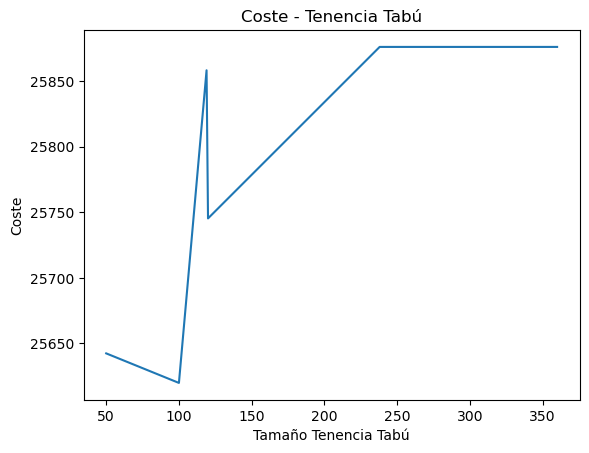

In [97]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.plot(n, costes)
plt.xlabel('Tamaño Tenencia Tabú')
plt.ylabel('Coste')
plt.title("Coste - Tenencia Tabú")
plt.savefig('i3.png')
plt.show()

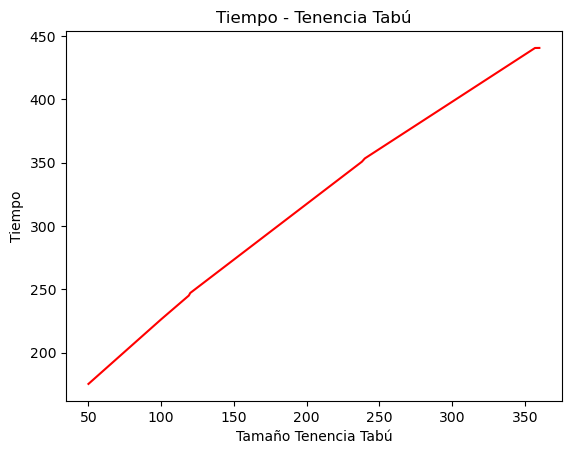

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.plot(n, tiempos, color='red')
plt.xlabel('Tamaño Tenencia Tabú')
plt.ylabel('Tiempo')
plt.title("Tiempo - Tenencia Tabú")
plt.savefig('i4.png')
plt.show()

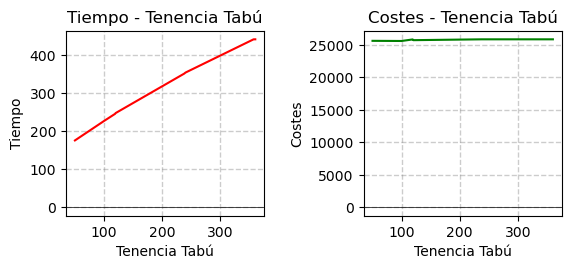

In [99]:
fig1 = plt.figure("Filtro")
fig1.subplots_adjust(hspace=0, wspace=0.5)

ax = fig1.add_subplot(2, 2, 1)
ax.plot(n, tiempos, color='red')
ax.set_xlabel('Tenencia Tabú')
ax.set_ylabel('Tiempo')
ax.set_title("Tiempo - Tenencia Tabú")
ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
ax.axhline(0, color='black', linewidth=0.5)

ax = fig1.add_subplot(2, 2, 2)
ax.plot(n, costes, color='green')
ax.set_xlabel('Tenencia Tabú')
ax.set_ylabel('Costes')
ax.set_title("Costes - Tenencia Tabú")
ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
ax.axhline(0, color='black', linewidth=0.5)

plt.show()

In [103]:
import statistics
media = statistics.mean(tiempos)
print(media)

309.9364764690399


### Búsqueda Tabú mejorada: El operador de generación de vecinos

In [147]:
from itertools import permutations
def gen_neighbours_tres(sol_act):
    n = len(sol_act)
    indices = list(range(n))
    vecinos = []

    for perm in permutations(indices, 3):
        i, j,k = perm
        if i < j and j < k:
            vecinos.append([i,j,k])
    return len(vecinos)
    
def gen_neighbours_dos(sol_act):
    n = len(sol_act)
    indices = list(range(n))
    vecinos = []

    for perm in permutations(indices, 2):
        i, j = perm
        if i < j:
            vecinos.append([i,j])
            
    return len(vecinos)


sol_act = [25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
neighbors = gen_neighbours_tres(sol_act)
print("3 posiciones: " ,neighbors)
neighbors = gen_neighbours_dos(sol_act)
print("2 posiciones: " ,neighbors)

3 posiciones:  18424
2 posiciones:  1176


### Búsqueda Tabú mejorada: Estrategia de reinicialización para dar diversificación con una estrategia de memoria a largo plazo

In [189]:
def tabu(loc):
    lista_tabu = []
    max_size_lista_tabu = int(0.8*loc.nciudades)
        
    s0 = gen_initial_solution_improved_greedy(loc)  
    coste_solucion_aux = cost(s0, loc)
    coste_solucion_actual = coste_solucion_aux
    
    solucion_actual = s0.copy()
    solucion_mejor = s0.copy()
    
    coste_solucion_mejor = float('inf')
    
    it = 0
    r = 0
    k = 0

    distancias = [loc.distancia(i, j) for i in range(loc.nciudades) for j in range(i+1, loc.nciudades)]
    d_max = max(distancias)
    d_min = min(distancias)
    d_diff = d_max - d_min

    frec = [[0] * loc.nciudades for i in range(loc.nciudades)]
    max_frec = 0

    while k < 10000:
        k += 1
        
        vecinos = gen_neighbours(solucion_actual)

        solucion_aux = solucion_actual.copy()
        coste_solucion_aux = coste_solucion_actual    

        coste_solucion_actual = float('inf')

        for par in vecinos:
            vecino = solucion_aux.copy()
            vecino[par[0]], vecino[par[1]] = vecino[par[1]], vecino[par[0]]

            if max_frec == 0:
                u = 0
            else:
                u = d_diff * (frec[par[0]][par[1]] / max_frec)

            coste_vecino = cost_vecino(coste_solucion_aux, solucion_aux, par, loc)
            coste_vecino+=u   
            
            
            if (par not in lista_tabu) and (coste_vecino < coste_solucion_actual):
                solucion_actual = vecino
                coste_solucion_actual = coste_vecino
                pos = par 

        if coste_solucion_actual == float('inf'):
            k += 1
            break

        frec[pos[0]][pos[1]]+= 1
        if frec[pos[0]][pos[1]] > max_frec:
            max_frec = frec[pos[0]][pos[1]]

        if coste_solucion_actual < coste_solucion_mejor:
            solucion_mejor = solucion_actual
            coste_solucion_mejor = coste_solucion_actual
            it = k

        lista_tabu.append(pos)

        if len(lista_tabu) > max_size_lista_tabu:
            lista_tabu = remove_first(lista_tabu) 

    print("Se han ejecutado", k, "iteraciones")
    print("La solución se encontró en la iteración:", it)
    print("La mejor solucion es:", solucion_mejor)
    print("El coste de la mejor solución es:", coste_solucion_mejor)
    return k, it, solucion_mejor, coste_solucion_mejor

In [190]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo50cidadesA.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 23
La mejor solucion es: [24, 42, 3, 29, 8, 44, 10, 31, 30, 49, 12, 1, 34, 13, 2, 7, 39, 16, 21, 28, 23, 37, 20, 4, 36, 18, 46, 17, 32, 22, 6, 33, 27, 14, 26, 11, 9, 15, 41, 48, 25, 45, 35, 47, 43, 19, 40, 5, 38]
El coste de la mejor solución es: 1094.843602924698
El tiempo que ha tardado es:  22.76244878768921


In [191]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/grafo100cidades.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 20
La mejor solucion es: [66, 88, 29, 67, 16, 76, 28, 21, 84, 39, 80, 56, 82, 6, 57, 33, 14, 54, 26, 72, 63, 11, 86, 91, 52, 90, 9, 99, 18, 46, 17, 32, 92, 64, 20, 4, 36, 71, 62, 22, 97, 7, 2, 13, 34, 95, 8, 81, 31, 30, 93, 49, 78, 1, 61, 73, 12, 87, 10, 44, 53, 75, 69, 59, 77, 42, 24, 3, 58, 85, 43, 47, 98, 83, 70, 60, 19, 40, 5, 38, 45, 25, 50, 89, 27, 74, 94, 96, 68, 35, 48, 41, 51, 15, 65, 79, 37, 55, 23]
El coste de la mejor solución es: 1645.1097398740126
El tiempo que ha tardado es:  146.90749764442444


In [130]:
inicio = time.time() 
tabu(Localizaciones(filename='./data/US120.txt'))
delta_time = time.time() - inicio
print("El tiempo que ha tardado es: ", delta_time)

Se han ejecutado 10000 iteraciones
La solución se encontró en la iteración: 13
La mejor solucion es: [91, 81, 109, 119, 89, 8, 38, 40, 105, 36, 42, 4, 59, 16, 35, 94, 18, 66, 3, 53, 50, 64, 74, 37, 84, 71, 82, 69, 83, 13, 78, 80, 114, 107, 77, 51, 79, 101, 10, 22, 68, 100, 90, 43, 32, 2, 110, 113, 14, 11, 58, 62, 75, 63, 24, 41, 21, 55, 28, 93, 65, 27, 86, 47, 60, 9, 20, 111, 49, 25, 17, 34, 92, 23, 52, 117, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 44, 102, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 61, 115, 106, 1, 98, 99, 56, 7, 19, 104, 46, 26]
El coste de la mejor solución es: 26528.31039772939
El tiempo que ha tardado es:  268.1195478439331
